# Project 1: Education and Wages
---

# Earnings By 

# How does choice of education/occupation affect future income and living prospects?
## Background
Describe the idea and how it’s a valid idea.
Education is widely believed to be the gateway to many opportunities, especially economical ones. There are many factors that can influence how education can be attained, such as affordability (student loans) and availability (geography). Therefore, the project will focus on possible correlations between the types of education providers, employment eventually obtained, associated income, financial stance, geography, and if all educational subjects are leading to economic success.

## Motivation
Talk about what motivates you to work on this project.

Education is supposed to be the key to socioeconomic status and financial betterment, but is the access to education the same everywhere and equally available to everyone? Is any degree a good degree, or are some education choices leaving students poorer than when they started with little hope to recover their losses?

We found interest in the interplay among education, occupation, income, financial stability, and geography. Our focus will be on data within the United States. Our goal is to delve deeper into these subjects, and explore the possibility of any connections between them.

## Questions to answer
How does choice of education/occupation affect future income and living prospects?
Identify which  (field and degree, including vocational schools) gives the strongest and weakest prospects?
Does the finding change with the number of people doing the same activity in a specific area? (too many data analysts in the silicon valley vs in Alabama?) 
Income vs. cost of life vs. purchasing power per zip code (i.e. income vs quality of life?)
Social ladder (truth or myth?): Prospect of children as a function of the situation of the parents? (related to upbringing: growing up with silver spoon assumes richer experience/better prospects)

Limitations:
- specificity
conflict of interest, sponsored?

In [1]:
# Dependencies
# import scipy.stats as st
# import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data from Kaggle:
# https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022
wages_by_education = pd.read_csv('Data/wages_by_education.csv')
wages_by_education.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


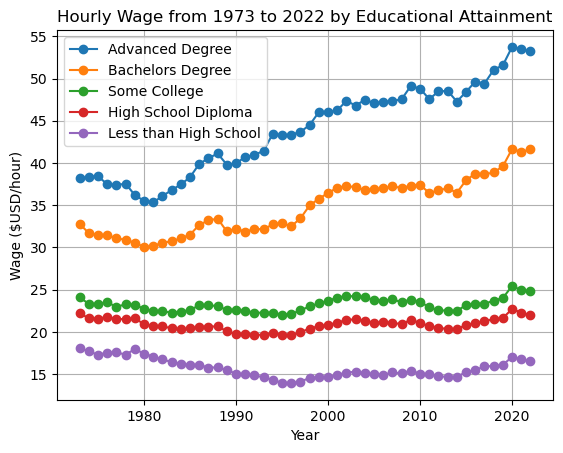

In [21]:
# Data Visualization: Wages by Education (Only General Data, not categorized by gender or ethnicity)
    # Probably don't need data from 1973, will clean later to match the years of other datasets we're looking at once we figure that out
    # From this, it's apparent that consistently over the course of these 4 decades, the higher degree the degree attained, generally the higher wage earned.
    # As time progresses, the difference is more apparent.
wages_by_education_general_df = pd.DataFrame(wages_by_education[['year', 'less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']])
wages_by_education_general_df.set_index('year', inplace=True)

# Plot the data
plt.plot(wages_by_education_general_df['advanced_degree'], label='Advanced Degree', marker='o')
plt.plot(wages_by_education_general_df['bachelors_degree'], label='Bachelors Degree', marker='o')
plt.plot(wages_by_education_general_df['some_college'], label='Some College', marker='o')
plt.plot(wages_by_education_general_df['high_school'], label='High School Diploma', marker='o')
plt.plot(wages_by_education_general_df['less_than_hs'], label='Less than High School', marker='o')

# Customize the plot
plt.title('Hourly Wage from 1973 to 2022 by Educational Attainment')
plt.xlabel('Year')
plt.ylabel('Wage ($USD/hour)')
plt.legend()
plt.grid(True)

# Save plot as png in 'Images' folder
plt.savefig('Images/wages_by_education.png')

# Display the plot
plt.show()

In [13]:
# Data from US Census (Median Earnings in the Past 12 Months (in 2022 Inflation-Adjusted Dollars) by Sex by Field of Bachelor's Degree for First Major):
# https://data.census.gov/table?t=Educational+Attainment:Income+and+Poverty
salary_by_gender_and_bachelors_df = pd.read_csv('Data/salary_by_gender_and_bachelors.csv')
salary_by_gender_and_bachelors_df.head()

,Label (Grouping),United States!!Estimate,United States!!Margin of Error
0,Total:,74154.0,±166
1,Science and Engineering,NaN,NaN
2,"Computers, Mathematics and Statistics",100283.0,±470
3,"Biological, Agricultural, and Environm...",76444.0,±586
4,Physical and Related Sciences,83706.0,"±1,244"


In [14]:
salary_by_major = pd.DataFrame(salary_by_gender_and_bachelors_df.iloc[2:18, :2])
salary_by_major.columns = ['Major', 'Salary ($)']
salary_by_major = salary_by_major.drop(12)

In [15]:
salary_by_major = salary_by_major.reset_index(drop=True)
salary_by_major['Salary ($)'] = salary_by_major['Salary ($)'].astype(int)
salary_by_major = salary_by_major.sort_values(by='Salary ($)', ascending=False)
salary_by_major

,Major,Salary ($)
5,Engineering,106736
0,"Computers, Mathematics and Statistics",100283
2,Physical and Related Sciences,83706
8,Business,80569
4,Social Sciences,80016
1,"Biological, Agricultural, and Environm...",76444
7,Science and Engineering Related Fields,75847
13,Communications,67010
11,Liberal Arts and History,65150
10,Literature and Languages,64276


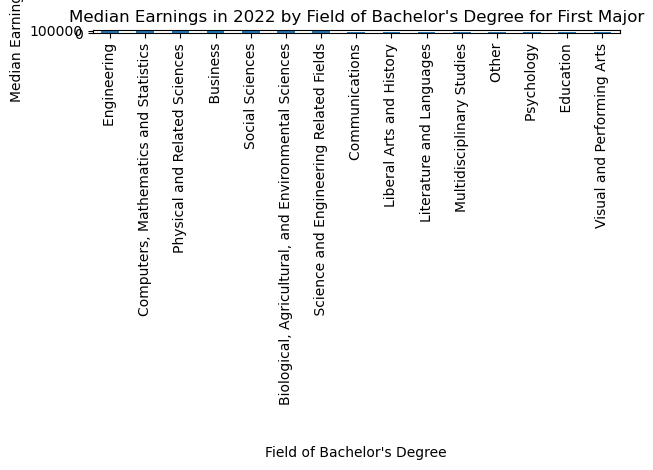

In [24]:
# Data Visualization: Median Earnings in 2022 by Field of Bachelor's Degree for First Major (general, mean salary among all data collected in 2022)
    # The highest-paying salary is Engineering at $106,736 USD & Computers, Mathematics, and Statistics as a runner-up at $100,283 USD.
    # The lowest-paying salary is visual and performing arts at $54,765 USD & Education as a runner-up at $57,093 USD.
# Plot the data
salary_by_major.plot(x='Major', y='Salary ($)', kind='bar', legend=False)

# Customize the plot
plt.title("Median Earnings in 2022 by Field of Bachelor's Degree for First Major")
plt.xlabel("Field of Bachelor's Degree")
plt.ylabel("Median Earnings ($)")
plt.xticks(rotation=90)
plt.tight_layout()

# Save plot as png in 'Images' folder
plt.savefig('Images/salary_by_major.png')

# Display the plot
plt.show()